# Geo-spatial data creation

**The aim is to obtain Africa data from corona CSV and merge with World geojson**

Libraries are pandas and Geopandas

Pandas - for statistical analysis
Geopandas - for geospatial statistical

In [3]:
# !pip install geopandas

In [4]:
import pandas as pd

import geopandas as gpd

**we will use :**

1. confirmed corona cases from John Hopkins University GitHub repository

2. World geoJson shapefile

3. CSV file with continents name


In [5]:
confirmed = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

data_cont =  r'https://raw.githubusercontent.com/oderofrancis/rona/main/Countries-Continents.csv'

world = r'https://raw.githubusercontent.com/oderofrancis/africa-corona/main/world.geojson'

Reading all data using pandas and geopandas

In [6]:
confirmed = pd.read_csv(confirmed)

data_cont = pd.read_csv(data_cont)

world = gpd.read_file(world)

Data tables and columns

In [7]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/30/22,12/31/22,1/1/23,1/2/23,1/3/23,1/4/23,1/5/23,1/6/23,1/7/23,1/8/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207550,207559,207616,207627,207654,207715,207748,207766,207766,207819
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333806,333806,333811,333812,333812,333818,333850,333887,333916,333947
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271223,271228,271229,271229,271230,271236,271244,271250,271254,271254
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47751,47751,47751,47751,47751,47751,47781,47781,47781,47781
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105095,105095,105095,105095,105095,105095,105095,105095,105095,105095


In [8]:
data_cont.head()

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina Faso


In [9]:
world.head()

,UN,NAME,LON,LAT,geometry
0,28,Antigua and Barbuda,-61.783,17.078,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,12,Algeria,2.632,28.163,"MULTIPOLYGON (((2.96361 36.80222, 2.98139 36.8..."
2,31,Azerbaijan,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,8,Albania,20.068,41.143,"MULTIPOLYGON (((19.43621 41.02107, 19.45055 41..."
4,51,Armenia,44.563,40.534,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."


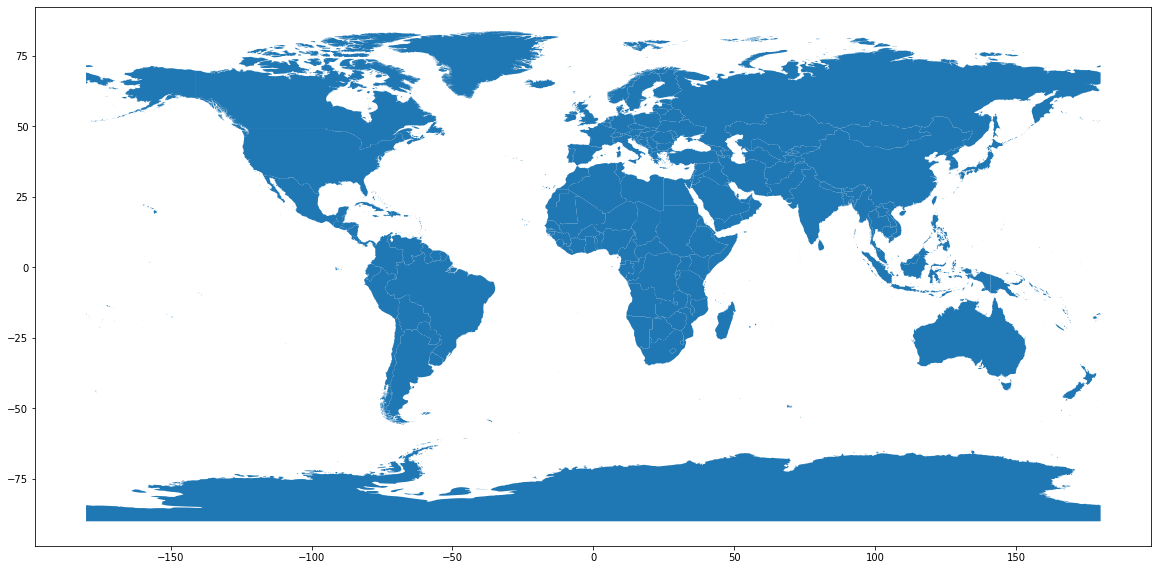

In [10]:
world.plot(figsize=(20,10))

# **Data analysis**

In [11]:
data_con = confirmed[['Country/Region',confirmed.columns[-1]]]

data_con.columns = ['country','confirmed']

data_cont.columns = ['continent','country']

world = world[['NAME', 'geometry']]

world.columns = ['country','geometry']

**Data merging**

In [12]:
data_con = pd.merge(left=data_cont, 
                right=data_con, how='left', 
                left_on='country', right_on='country'
            )

In [13]:
data_con.head()

,continent,country,confirmed
0,Africa,Algeria,271254.0
1,Africa,Angola,105095.0
2,Africa,Benin,27982.0
3,Africa,Botswana,328071.0
4,Africa,Burkina Faso,22006.0


**Data merging with geojson**

In [14]:
geo_data_con = pd.merge(left=data_con, 
                right=world, how='left', 
                left_on='country', right_on='country'
            )


geo_data_con = gpd.GeoDataFrame(geo_data_con)

In [15]:
geo_data_con.head()

,continent,country,confirmed,geometry
0,Africa,Algeria,271254.0,"MULTIPOLYGON (((2.96361 36.80222, 2.98139 36.8..."
1,Africa,Angola,105095.0,"MULTIPOLYGON (((11.75083 -16.75528, 11.77500 -..."
2,Africa,Benin,27982.0,"MULTIPOLYGON (((2.48442 6.34049, 2.48000 6.338..."
3,Africa,Botswana,328071.0,"MULTIPOLYGON (((26.95919 -23.75208, 26.96331 -..."
4,Africa,Burkina Faso,22006.0,"MULTIPOLYGON (((-2.83405 11.00201, -2.83361 10..."


In [16]:
data_africa = geo_data_con[geo_data_con['continent'] == 'Africa']

In [17]:
data_africa.head()

,continent,country,confirmed,geometry
0,Africa,Algeria,271254.0,"MULTIPOLYGON (((2.96361 36.80222, 2.98139 36.8..."
1,Africa,Angola,105095.0,"MULTIPOLYGON (((11.75083 -16.75528, 11.77500 -..."
2,Africa,Benin,27982.0,"MULTIPOLYGON (((2.48442 6.34049, 2.48000 6.338..."
3,Africa,Botswana,328071.0,"MULTIPOLYGON (((26.95919 -23.75208, 26.96331 -..."
4,Africa,Burkina Faso,22006.0,"MULTIPOLYGON (((-2.83405 11.00201, -2.83361 10..."


In [18]:
len(data_africa)

54

In [21]:
data_africa.sort_values(by='confirmed',ascending=False).head(10)

,continent,country,confirmed,geometry
44,Africa,South Africa,4050082.0,"MULTIPOLYGON (((37.85083 -46.95695, 37.84638 -..."
33,Africa,Morocco,1271881.0,"MULTIPOLYGON (((-9.05317 32.73480, -9.03500 32..."
50,Africa,Tunisia,1147645.0,"MULTIPOLYGON (((10.99361 33.75000, 10.93778 33..."
14,Africa,Egypt,515645.0,"MULTIPOLYGON (((34.00139 26.70722, 33.99667 26..."
27,Africa,Libya,507153.0,"MULTIPOLYGON (((9.94833 27.82444, 9.95417 27.8..."
17,Africa,Ethiopia,498669.0,"MULTIPOLYGON (((36.54282 14.26205, 36.55333 14..."
24,Africa,Kenya,342599.0,"MULTIPOLYGON (((41.13805 -2.12444, 41.09750 -2..."
52,Africa,Zambia,335545.0,"MULTIPOLYGON (((24.97000 -17.55972, 24.91250 -..."
3,Africa,Botswana,328071.0,"MULTIPOLYGON (((26.95919 -23.75208, 26.96331 -..."
32,Africa,Mauritius,291335.0,"MULTIPOLYGON (((57.57250 -20.51417, 57.52944 -..."


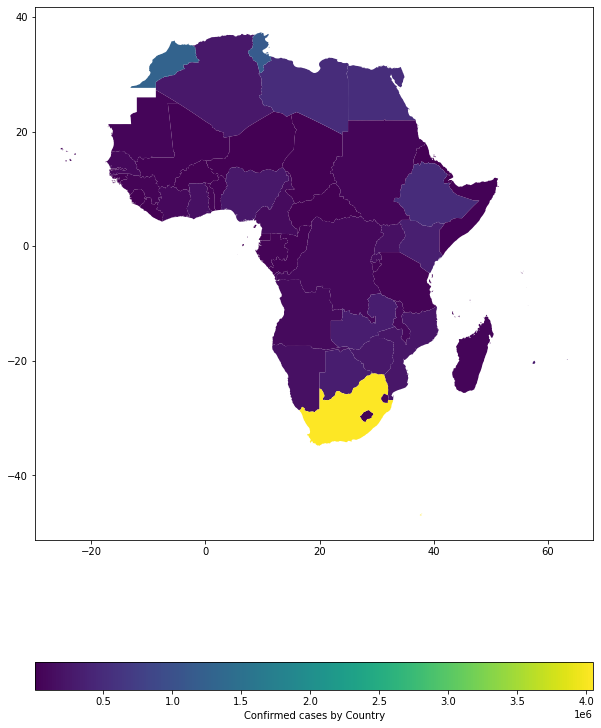

In [22]:
data_africa.plot(figsize=(10,15),column='confirmed',
                  legend=True,
                    legend_kwds={'label': "Confirmed cases by Country",
                                 'orientation': "horizontal"}
                 )